# Indian Premier League Match Score Prediction using Machine Learning ALgorithms

In [447]:
##importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [448]:
##loading the csv files into dataframes
match_df = pd.read_csv("data/matches.csv")
dlvr_df = pd.read_csv("data/deliveries.csv")
match_df.sample(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Unnamed: 17,win_by_runs,win_by_wickets
610,1082625,Rajkot,29-04-2017,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney,NaN,0.0,7.0
609,1082624,Pune,29-04-2017,LH Ferguson,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Rising Pune Supergiant,runs,61.0,N,NaN,KN Ananthapadmanabhan,M Erasmus,NaN,0.0,5.0
722,1178402,Mumbai,13-04-2019,JC Buttler,Wankhede Stadium,0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,NaN,Nitin Menon,A Nand Kishore,NaN,0.0,4.0
128,419119,Mumbai,20-03-2010,JH Kallis,Brabourne Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,7.0,N,NaN,HDPK Dharmasena,SS Hazare,NaN,0.0,6.0
234,501258,Indore,15-05-2011,BJ Hodge,Holkar Cricket Stadium,0,Kochi Tuskers Kerala,Rajasthan Royals,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,8.0,N,NaN,PR Reiffel,RJ Tucker,NaN,2.0,0.0


In [449]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  Unnamed: 17     

In [450]:
dlvr_df.head()

,match_id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,Unnamed: 18,runs,wickets,overs,runs_last_5,wickets_last_5
0,335982.0,1.0,6.0,5.0,RT Ponting,BB McCullum,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,1.0,0.0,0.1,1.0,0.0
1,335982.0,1.0,6.0,6.0,BB McCullum,RT Ponting,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,1.0,0.0,0.2,1.0,0.0
2,335982.0,1.0,7.0,1.0,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,2.0,0.0,0.2,2.0,0.0
3,335982.0,1.0,7.0,2.0,BB McCullum,RT Ponting,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,2.0,0.0,0.3,2.0,0.0
4,335982.0,1.0,7.0,3.0,RT Ponting,BB McCullum,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,2.0,0.0,0.4,2.0,0.0


In [451]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256421 entries, 0 to 256420
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          193468 non-null  float64
 1   inning            193468 non-null  float64
 2   over              193468 non-null  float64
 3   ball              193468 non-null  float64
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193468 non-null  float64
 8   extra_runs        193468 non-null  float64
 9   total_runs        193468 non-null  float64
 10  non_boundary      193468 non-null  float64
 11  is_wicket         193468 non-null  float64
 12  dismissal_kind    9495 non-null    object 
 13  player_dismissed  9495 non-null    object 
 14  fielder           6784 non-null    object 
 15  extras_type       10233 non-null   object 
 16  batting_team      19

## Exploratory Data Analysis

* Looking at all the teams in the teams and winners' column
* Checking for missing values for the no result matches
* Encoding Team Names
* Visualizing the toss wins and match wins by each team


### Looking at all the teams in the teams and winners' column

In [452]:
match_df['winner'].value_counts()


Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [453]:
match_df['team1'].value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [454]:
match_df[match_df['winner'].isnull() == True]


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Unnamed: 17,win_by_runs,win_by_wickets
241,501265,Delhi,21-05-2011,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker,NaN,0.0,9.0
486,829763,Bangalore,29-04-2015,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak,NaN,32.0,0.0
511,829813,Bangalore,17-05-2015,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,NaN,0.0,7.0
744,1178424,Bengaluru,30-04-2019,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong,NaN,0.0,0.0


In [455]:
##replacing null results with draw
match_df['winner'].fillna('Draw', inplace=True)

In [456]:
match_df[match_df['winner'].isnull() == True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Unnamed: 17,win_by_runs,win_by_wickets


### Encoding Team Names 

In [457]:

team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

match_df.replace(team_encode_dict, inplace=True)
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Unnamed: 17,win_by_runs,win_by_wickets
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,NaN,35.0,0.0
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5,runs,33.0,N,NaN,MR Benson,SL Shastri,NaN,0.0,7.0
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,7,6,6,bat,7,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,NaN,0.0,10.0
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3,wickets,5.0,N,NaN,SJ Davis,DJ Harper,NaN,0.0,6.0
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,2,4,4,bat,2,wickets,5.0,N,NaN,BF Bowden,K Hariharan,NaN,15.0,0.0


In [458]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    int64  
 7   team2            816 non-null    int64  
 8   toss_winner      816 non-null    int64  
 9   toss_decision    816 non-null    object 
 10  winner           816 non-null    int64  
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  Unnamed: 17     

### Exploring City Column

In [459]:
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Durban             15
Bengaluru          15
Visakhapatnam      13
Centurion          12
Sharjah            12
Ahmedabad          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [460]:
## checking for missing values
match_df[match_df['city'].isnull() == True ]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Unnamed: 17,win_by_runs,win_by_wickets
399,729281,NaN,17-04-2014,YS Chahal,Sharjah Cricket Stadium,1,7,3,3,field,3,wickets,8.0,N,NaN,Aleem Dar,S Ravi,NaN,4.0,0.0
402,729287,NaN,19-04-2014,PA Patel,Dubai International Cricket Stadium,1,3,1,3,field,3,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,NaN,87.0,0.0
403,729289,NaN,19-04-2014,JP Duminy,Dubai International Cricket Stadium,1,2,7,2,bat,7,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,NaN,86.0,0.0
404,729291,NaN,20-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,6,9,9,field,9,wickets,7.0,N,NaN,BF Bowden,M Erasmus,NaN,0.0,5.0
406,729295,NaN,22-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,9,10,10,field,9,runs,72.0,N,NaN,M Erasmus,S Ravi,NaN,0.0,7.0
407,729297,NaN,23-04-2014,RA Jadeja,Dubai International Cricket Stadium,1,6,5,6,field,5,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,NaN,0.0,9.0
408,729299,NaN,24-04-2014,CA Lynn,Sharjah Cricket Stadium,1,3,2,3,field,2,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,NaN,0.0,7.0
409,729301,NaN,25-04-2014,AJ Finch,Dubai International Cricket Stadium,1,10,7,10,bat,10,runs,4.0,N,NaN,M Erasmus,S Ravi,NaN,0.0,5.0
410,729303,NaN,25-04-2014,MM Sharma,Dubai International Cricket Stadium,1,5,1,1,bat,5,wickets,7.0,N,NaN,BF Bowden,M Erasmus,NaN,130.0,0.0
413,729309,NaN,27-04-2014,M Vijay,Sharjah Cricket Stadium,1,7,1,1,bat,7,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,NaN,0.0,5.0


In [461]:
#Lookin at the number of rows and columns in the dataset
match_df.shape

(816, 20)

In [462]:
#Getting the frequency of most man of the match awards
match_df['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
DP Nannes          1
CR Brathwaite      1
Imran Tahir        1
SP Goswami         1
RE Levi            1
Name: player_of_match, Length: 233, dtype: int64

In [463]:
#Getting the top 10 players with most man of the match awards
match_df['player_of_match'].value_counts()[0:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
G Gambhir         13
V Kohli           13
Name: player_of_match, dtype: int64

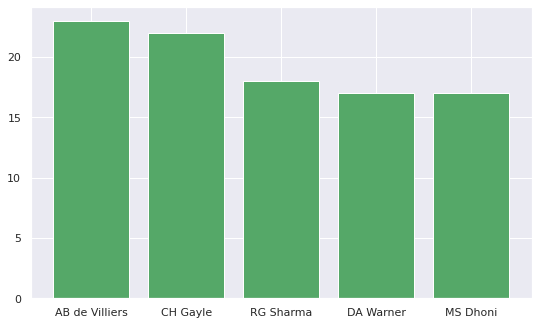

In [464]:
#making a bar-plot for the top 5 players with most man of the match awards
plt.figure(figsize=(8,5))
plt.bar(list(match_df['player_of_match'].value_counts()[0:5].keys()),list(match_df['player_of_match'].value_counts()[0:5]),color="g")
plt.show()

In [465]:
#Extracting the records where a team won batting first
batting_first=match_df[match_df['win_by_runs']!=0]

**All the missing values in the city column are for the matches that were played at Dubai International Stadium.**

In [466]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.describe()

,id,neutral_venue,team1,team2,toss_winner,winner,result_margin,Unnamed: 17,win_by_runs,win_by_wickets
count,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,799.000000,0.0,756.000000,756.000000
mean,7.563496e+05,0.094363,5.621324,5.656863,5.558824,5.474265,17.321652,NaN,13.283069,3.350529
std,3.058943e+05,0.292512,3.487751,3.476110,3.467850,3.517783,22.068427,NaN,23.471144,3.387963
min,3.359820e+05,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,5.012278e+05,0.000000,3.000000,3.000000,2.750000,2.000000,6.000000,NaN,0.000000,0.000000
50%,7.292980e+05,0.000000,5.000000,5.000000,5.000000,5.000000,8.000000,NaN,0.000000,4.000000
75%,1.082626e+06,0.000000,9.000000,9.000000,8.000000,9.000000,19.500000,NaN,19.000000,6.000000
max,1.237181e+06,1.000000,14.000000,14.000000,14.000000,15.000000,146.000000,NaN,146.000000,10.000000


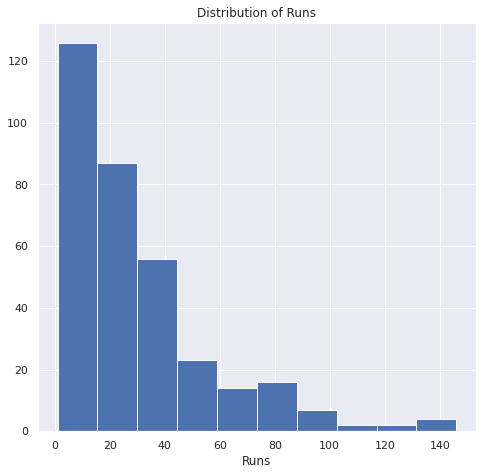

In [467]:
#Making a histogram 
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show()

In [468]:
#Finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts().keys()

Int64Index([1, 2, 5, 3, 9, 6, 7, 10, 14, 4, 11, 12, 8, 13, 15], dtype='int64')

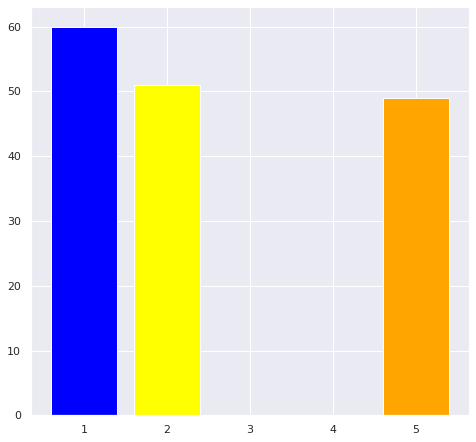

In [469]:
#Making a bar-plot for top 3 teams with most wins after batting first
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.show()

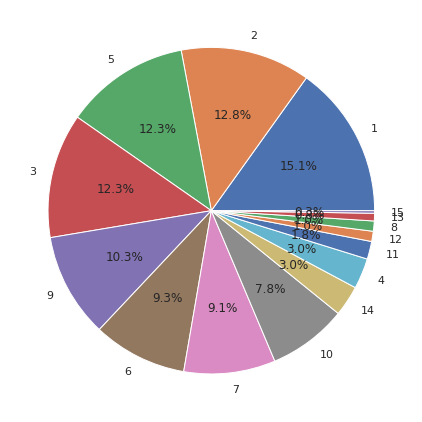

In [470]:
#Making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [471]:
#extracting those records where a team has won after batting second
batting_second=match_df[match_df['win_by_wickets']!=0]

In [472]:
#looking at the head
batting_second.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Unnamed: 17,win_by_runs,win_by_wickets
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5,runs,33.0,N,NaN,MR Benson,SL Shastri,NaN,0.0,7.0
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,7,6,6,bat,7,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,NaN,0.0,10.0
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3,wickets,5.0,N,NaN,SJ Davis,DJ Harper,NaN,0.0,6.0
5,335987,Jaipur,21-04-2008,SR Watson,Sawai Mansingh Stadium,0,6,9,9,bat,6,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,NaN,0.0,9.0
6,335988,Hyderabad,22-04-2008,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,4,7,4,bat,7,wickets,9.0,N,NaN,IL Howell,AM Saheba,NaN,0.0,4.0


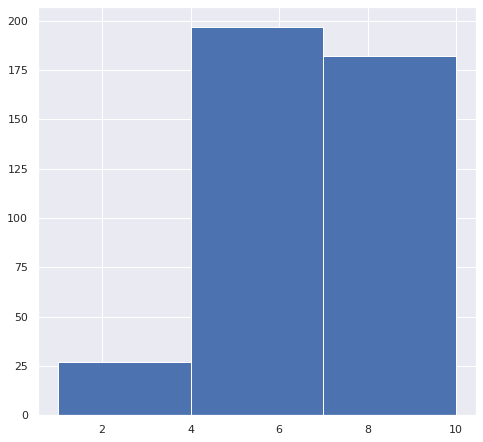

In [473]:
#Making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=3)
plt.show()

In [474]:
#Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

1     68
5     62
2     54
9     51
6     49
3     48
10    43
7     31
4     17
14    15
13     9
11     8
8      7
15     2
12     2
Name: winner, dtype: int64

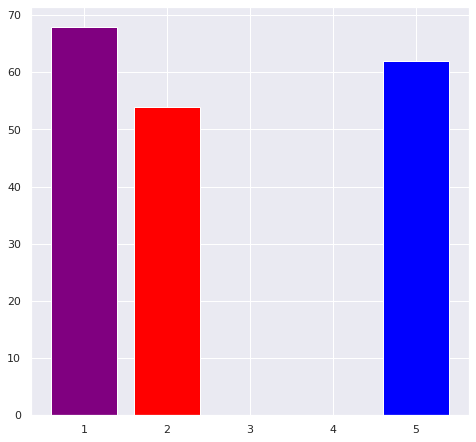

In [475]:
#Making a bar plot for top-3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["purple","blue","red"])
plt.show()

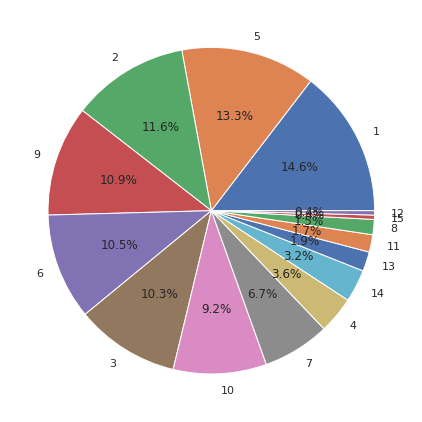

In [476]:
#Making a pie chart for distribution of most wins after batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [477]:
df = pd.DataFrame(match_df)
df.describe()

,id,neutral_venue,team1,team2,toss_winner,winner,result_margin,Unnamed: 17,win_by_runs,win_by_wickets
count,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,799.000000,0.0,756.000000,756.000000
mean,7.563496e+05,0.094363,5.621324,5.656863,5.558824,5.474265,17.321652,NaN,13.283069,3.350529
std,3.058943e+05,0.292512,3.487751,3.476110,3.467850,3.517783,22.068427,NaN,23.471144,3.387963
min,3.359820e+05,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,5.012278e+05,0.000000,3.000000,3.000000,2.750000,2.000000,6.000000,NaN,0.000000,0.000000
50%,7.292980e+05,0.000000,5.000000,5.000000,5.000000,5.000000,8.000000,NaN,0.000000,4.000000
75%,1.082626e+06,0.000000,9.000000,9.000000,8.000000,9.000000,19.500000,NaN,19.000000,6.000000
max,1.237181e+06,1.000000,14.000000,14.000000,14.000000,15.000000,146.000000,NaN,146.000000,10.000000


In [478]:
deliveries=pd.read_csv('data/deliveries.csv')

In [479]:
deliveries.head()

,match_id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,Unnamed: 18,runs,wickets,overs,runs_last_5,wickets_last_5
0,335982.0,1.0,6.0,5.0,RT Ponting,BB McCullum,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,1.0,0.0,0.1,1.0,0.0
1,335982.0,1.0,6.0,6.0,BB McCullum,RT Ponting,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,1.0,0.0,0.2,1.0,0.0
2,335982.0,1.0,7.0,1.0,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,2.0,0.0,0.2,2.0,0.0
3,335982.0,1.0,7.0,2.0,BB McCullum,RT Ponting,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,2.0,0.0,0.3,2.0,0.0
4,335982.0,1.0,7.0,3.0,RT Ponting,BB McCullum,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,2.0,0.0,0.4,2.0,0.0


In [480]:
deliveries['match_id'].unique()

array([ 335982.,  335983.,  335984.,  335985.,  335986.,  335987.,
        335988.,  335989.,  335990.,  335991.,  335992.,  335993.,
        335994.,  335995.,  335996.,  335997.,  335998.,  335999.,
        336000.,  336001.,  336002.,  336003.,  336004.,  336005.,
        336006.,  336007.,  336008.,  336009.,  336010.,  336011.,
        336012.,  336013.,  336014.,  336015.,  336016.,  336017.,
        336018.,  336019.,  336020.,  336021.,  336022.,  336023.,
        336024.,  336025.,  336026.,  336027.,  336028.,  336029.,
        336031.,  336032.,  336033.,  336034.,  336035.,  336036.,
        336037.,  336038.,  336039.,  336040.,  392181.,  392182.,
        392183.,  392184.,  392185.,  392186.,  392188.,  392189.,
        392190.,  392191.,  392192.,  392194.,  392195.,  392196.,
        392197.,  392198.,  392199.,  392200.,  392201.,  392202.,
        392203.,  392204.,  392205.,  392206.,  392207.,  392208.,
        392209.,  392210.,  392211.,  392212.,  392213.,  3922

In [481]:
print(f'Before Removing Overs : {data.shape}')
data = deliveries[deliveries['overs'] >= 5.0]
print(f'After Removing Overs : {deliveries.shape}')
data.head()

Before Removing Overs : (15,)
After Removing Overs : (256421, 24)


,match_id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,Unnamed: 18,runs,wickets,overs,runs_last_5,wickets_last_5
32,335982.0,1.0,12.0,1.0,RT Ponting,BB McCullum,JH Kallis,0.0,0.0,0.0,0.0,1.0,caught,RT Ponting,P Kumar,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,61.0,0.0,5.1,59.0,0.0
33,335982.0,1.0,12.0,2.0,BB McCullum,DJ Hussey,JH Kallis,4.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,61.0,1.0,5.2,59.0,1.0
34,335982.0,1.0,12.0,3.0,BB McCullum,DJ Hussey,JH Kallis,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,61.0,1.0,5.3,59.0,1.0
35,335982.0,1.0,12.0,4.0,BB McCullum,DJ Hussey,JH Kallis,2.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,61.0,1.0,5.4,59.0,1.0
36,335982.0,1.0,12.0,5.0,BB McCullum,DJ Hussey,JH Kallis,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,61.0,1.0,5.5,58.0,1.0


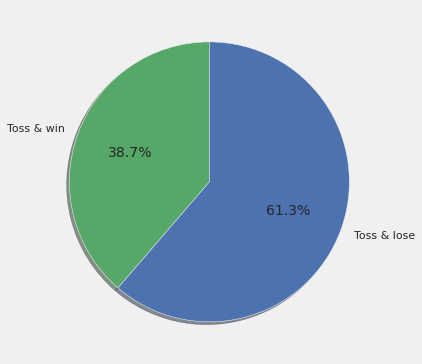

In [482]:
#probability of match winning by winning toss for MI
#df['toss_winner'].value_counts()
count =0
for i in range(577): 
    if df["toss_winner"][i]==df["winner"][i]==1 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

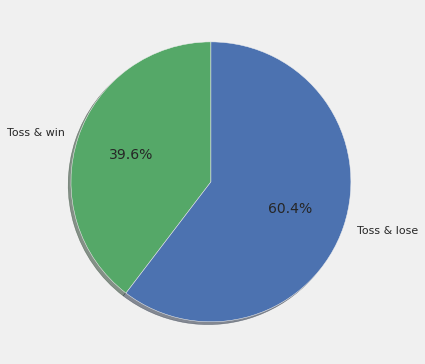

In [483]:
#probability of match winning by winning toss for Chennai Super Kings CSK
#df['toss_winner'].value_counts()
count =0
for i in range(577): 
    if df["toss_winner"][i]==df["winner"][i]==5 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

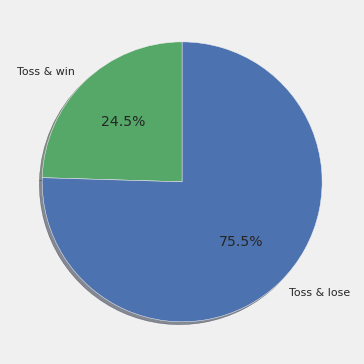

In [484]:
#probability of match winning by winning toss for KXIP
#df['toss_winner'].value_counts()
count =0
for i in range(577): 
    if df["toss_winner"][i]==df["winner"][i]==9 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

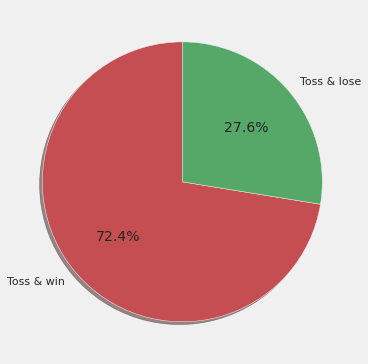

In [485]:
#genralised probbaility for winning match by winning toss


import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]

slices=[len(df_fil),(577-len(df_fil))]

mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

In [486]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Unnamed: 17,win_by_runs,win_by_wickets
0,335982,2,18-04-2008,BB McCullum,14,0,3,2,3,1,2,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,NaN,35.0,0.0
1,335983,7,19-04-2008,MEK Hussey,23,0,9,5,5,0,5,runs,33.0,N,NaN,MR Benson,SL Shastri,NaN,0.0,7.0
2,335984,10,19-04-2008,MF Maharoof,8,0,7,6,6,0,7,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,NaN,0.0,10.0
3,335985,23,20-04-2008,MV Boucher,35,0,1,3,1,0,3,wickets,5.0,N,NaN,SJ Davis,DJ Harper,NaN,0.0,6.0
4,335986,22,20-04-2008,DJ Hussey,7,0,2,4,4,0,2,wickets,5.0,N,NaN,BF Bowden,K Hariharan,NaN,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,12,28-09-2020,AB de Villiers,6,0,3,1,1,1,3,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,NaN,NaN,NaN
812,1237177,12,05-11-2020,JJ Bumrah,6,0,1,14,14,1,1,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,NaN,NaN,NaN
813,1237178,0,06-11-2020,KS Williamson,30,0,3,10,10,1,10,wickets,6.0,N,NaN,PR Reiffel,S Ravi,NaN,NaN,NaN
814,1237180,0,08-11-2020,MP Stoinis,30,0,14,10,14,0,14,runs,17.0,N,NaN,PR Reiffel,S Ravi,NaN,NaN,NaN


# Top Player of the match winners

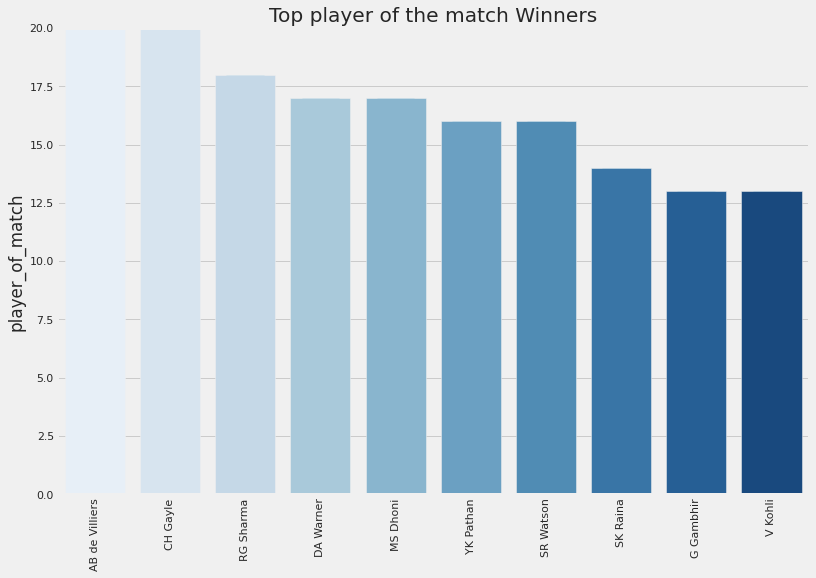

In [487]:
top_players = match_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

<h2><u><font color = "blue">AB de Viliers</font></u>
 is the most Successful player in all match 

# So Mumbai Indians have won the maximum matches

<h2><b><font color = "blue">Lets see it virtually</font></b>

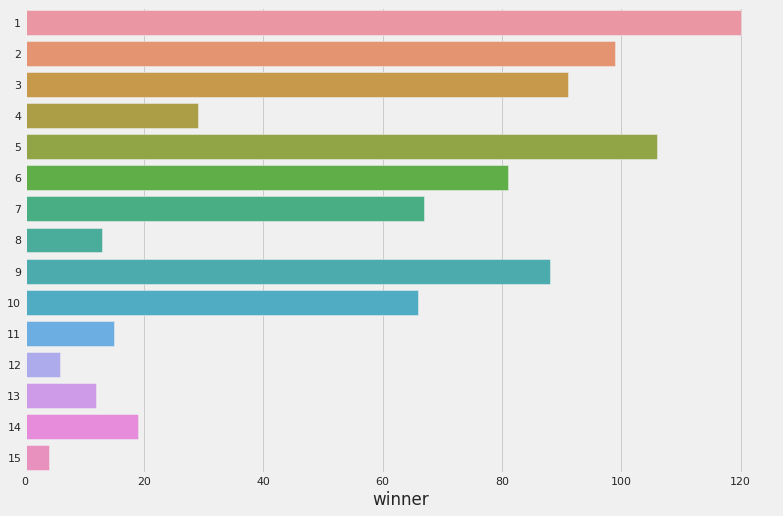

In [488]:

data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

### Dropping all the redundant columns

In [489]:
match_df = match_df[['id', 'team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head()

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,335982,3,2,2,1,3,14,2
1,335983,9,5,7,0,5,23,5
2,335984,7,6,10,0,6,8,7
3,335985,1,3,23,0,1,35,3
4,335986,2,4,22,0,4,7,2


In [490]:
match_df.describe()

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
count,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,7.563496e+05,5.621324,5.656863,14.344363,0.607843,5.558824,18.169118,5.474265
std,3.058943e+05,3.487751,3.476110,8.504220,0.488531,3.467850,10.024183,3.517783
min,3.359820e+05,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,5.012278e+05,3.000000,3.000000,8.000000,0.000000,2.750000,8.000000,2.000000
50%,7.292980e+05,5.000000,5.000000,15.000000,1.000000,5.000000,16.000000,5.000000
75%,1.082626e+06,9.000000,9.000000,22.000000,1.000000,8.000000,27.000000,9.000000
max,1.237181e+06,14.000000,14.000000,31.000000,1.000000,14.000000,35.000000,15.000000


### Toss Wins and Match Wins by each Team

In [491]:
##looking at number of toss wins and match wins
toss_wins = match_df['winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")


Mumbai Indians -> 120
Chennai Super Kings -> 106
Kolkata Knight Riders -> 99
Royal Challengers Bangalore -> 91
Kings XI Punjab -> 88
Rajasthan Royals -> 81
Delhi Daredevils -> 67
Sunrisers Hyderabad -> 66
Deccan Chargers -> 29
Pune Warriors -> 19
Rising Pune Supergiants -> 15
Gujarat Lions -> 13
Kochi Tuskers Kerala -> 12
Rising Pune Supergiant -> 6
Delhi Capitals -> 4


### Plotting Wins by each team on a Histogram

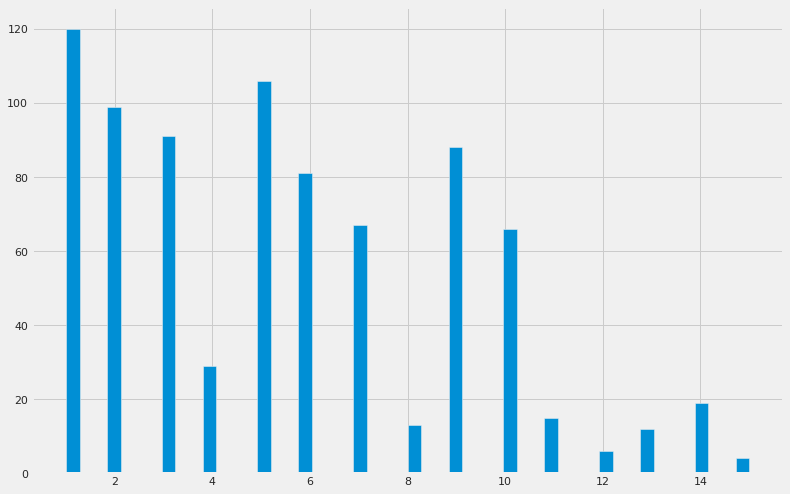

In [492]:
match_df['winner'].hist(bins=50)

In [493]:
match_df['winner'].value_counts()

1     120
5     106
2      99
3      91
9      88
6      81
7      67
10     66
4      29
14     19
11     15
8      13
13     12
12      6
15      4
Name: winner, dtype: int64

In [494]:
# #we maintain a dictionary for future reference mapping teams
# dicVal = encode['winner']
# print(dicVal['MI']) #key value
# print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

Text(0.5, 1.0, 'Match winners')

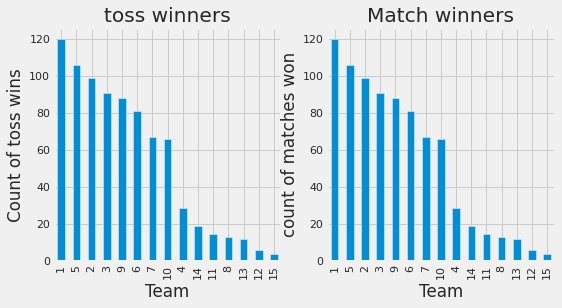

In [495]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [496]:
match_df.isnull().sum()

id               0
team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

## Data Preparation

**Encoding all the remaining features**

* city
* toss_decision
* venue

In [497]:
##using the label encoder
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'toss_decision', 'venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)

match_df

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,335982,3,2,2,1,3,14,2
1,335983,9,5,7,0,5,23,5
2,335984,7,6,10,0,6,8,7
3,335985,1,3,23,0,1,35,3
4,335986,2,4,22,0,4,7,2
...,...,...,...,...,...,...,...,...
811,1216547,3,1,12,1,1,6,3
812,1237177,1,14,12,1,14,6,1
813,1237178,3,10,0,1,10,30,10
814,1237180,14,10,0,0,14,30,14


## Machine Learning

In [498]:
##splitting the data for training and testing

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(652, 8)
(164, 8)


In [499]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np


def print_model_scores(model, data, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        predictors: independent feature variable
        target: target variable
    '''
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    print(predictions)
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")

### Logistic Regression

In [500]:
target_var=['winner']
outcome_var=['winner']
predictor_var = ['team1','team2','venue', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)

[ 1  6 10  2  5  5  6  9  2  1  1  1 10  9  3  9  6  6  5  2 10  9  1  9
  9 10  9 10  9  2  3  6  2  6  3  6  1  2  9  6  2  6  5 10  1  2  2  3
 10  6  1  5  1  6  1  9  5  2  1  5  5  1  3  6  3  6  5  3  5  2  2  2
  6  2 10  9  6  3 10  3  9  3  3  1  2  2  6  6  1  6  2  5  6  3  1  2
  3  3  1 10  3  2  9 10  5  1  3  6  1 15  1  1  1  2  1  3 10  3  3  1
  5  2  5  3 10  3  5  3  2  3  1  3 10  1  1  3  9  9  1  9  5 10  6  1
  9  1  2  9  6  5  6  2  1  5  3  6  9  5 10  6  5 10  9  3  5  2  1  1
  9  1 10  2  5  2  1  9  6 10  1  9  2  2  2  2  9  2  2  9  1  2 10  1
  1 10  2  2 10  9 10  2  5  6  1  2  1  2  5  5  6  5  3  2  9  5 10  6
  7  3 14  2  3 15  1  3  2  1  9  5  9  5  1  2  2  1 10  2  5  3  6  5
  3  1 10  1  9  6 10  9  2 14  1  5  5  9  2  5  1  6  9  1 10  3  9  2
  5  5  3  1  1  1  9  5  5  3  2  5  1  1  5  1  2  1  5  3  5  2  3  3
  2  3  2  2  1 10  5  3  3  5  2  5  1  6  2  6  1  9  3  3  3  9 10  3
  1  5  1  9  2 10 14  2  9  1  6  3  6  2 10  3  1

### Random Forest Classifier

In [501]:
model = RandomForestClassifier(n_estimators=100)
target_var = ['winner']
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
print_model_scores(model, match_df,predictor_var, target_var)

[ 3  5  7  1  2  6  7  1  6  9  6  5  4  9  5  1  3  9  6  5  3  9  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  9  4  7  9  4
  1  6  3  9  7  5  1  9  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  6  5  4  1  2
  5  4  1  1  5  3  5  5  6  3  7 13  2  6  1  9 13  4  2 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 15  3  1  5  1  3  5  1  2 13  6  3  5  2 13  1  3  7  1  5  9  2  4
 13  2  6  1  6  3  9  7  5  3  5 13  1  2  6  7  1  4  7  9  2  7  1  5
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  7  1 13 10

In [502]:
#Decision tree algorithm
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
print_model_scores(model, match_df,predictor_var, target_var)

[ 3  5  6  1  2  6  7  1  6  9  6  5  4  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  2 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  5 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 15  3  1  5  1  3  5  1  2 13  6  3  5  2  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  3  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1  9 10

In [503]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
print_model_scores(model, match_df,predictor_var, target_var)

[ 3  5  7  1  2  6  7  1  6  9  6  5  4  9  5  1  3  9  6  5  3  9  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  6  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  9  2  4
  6  3  5  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  9  4  3  9  6  4  1  5  6  5  4  1  2
  5  4  1  1  5  3  5  5  6  3  1 13  2  6  1  9 13  4  2 12  5  9  7  2
  1  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  5  1  3  9  5 13  9  6  5  9  3  4  9 12  4  9  5  2  1
  4 15  3  1  5  1  3  5  1  2  1  6  3  5  2  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  9  7  5  9  5 13  9  2  6  7  1  4  7  9  2  7  1  5
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  7  1  9 10

In [504]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
print_model_scores(model, match_df,predictor_var,outcome_var)

[ 3  5  7  1  2  6  7  1  6  9  6  5  1  9  5  1  3  9  6  5  4  2  1  6
  3  4  1  5  2  6  1  5  4  6  9  2  1  9  7  1  9  2  1  5  7  6  9  5
  9  1  5  3  2  6  7  6  1  5  4  3  7  4  5  1  4  7  3  3  4  5  9  3
  1  5  4  9  5  5  1  3  5  3  2  4  5  9  2  2  5  5  1  9  4  1  4  3
  3  1  3  3  3  7  1  4  3  7  2  3  2  3  1  3  2  4  4  1  1  9  2  5
  6  3  5  1  3  7  4  6  1  4  5  1  3  9  1  6  9  3  6  1  2  1  5  7
  2  2  5  1  9  7  4  1  6  2  3  9  4  3  9  6  4  1  5  6  5  4  1  2
  4  4  1  1  3  3  1  5  6  3  7 13  2  6  1  9 13  4  2  1  5  9  4  2
  3  4  1  2  9  5  3  9  1  6  5  3  1  3  2  6  3  7  2  6  5  1 10  1
  5  1  2  6  3  5  1  3  9  6  6  9  2  5  9  3  1  9  9  2  9  5  2  1
  9  7  3  1  5  1  1  5  1  2  1  6  7  1  2  9  1  3  7  1  5  9  2  4
 13  2  6  1  6  3  2  7  5  9  5  7  9  2  6  6  1  3  7  5  2  7  1  5
  4  6  3  2  5  2  9  1  3  2  6  7  1  5  1  1  5  6  9  1  5  7  1  9
  3  6  9  2  4  6  2  1  5  1  2  1 10  7  1  9 10

In [505]:
#Gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)
print_model_scores(model, match_df,predictor_var, target_var)

[ 3  5  6  1  2  6  7  1  6  9 15  5  4  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  9  4  7  9  4
  1  6  3  9  7  5  1  9  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  7  3  5  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  6  5  4  1  2
  5  4  1  1  5  3  5  5  6  3  7 13  2  6  1  9 13  4  2 12  5  9  7  2
 12  4  1 12  9  5  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  5  1  3 13  5 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 15  3  1  5  1  3  5  1  2 13  6  3  5  2 13  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  9  5 13  9  2  6 13  1  4  7  9  2  7  1  5
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  6  1 13 10

### Sample Prediction

In [506]:
team1='Mumbai Indians'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[['1' '10' '14' '10' '2' '1']]
The winner would be: Mumbai Indians


### Feature Importance

In [507]:
pd.Series(index= predictor_var, data=model.feature_importances_)

team1            0.326300
team2            0.332646
venue            0.103420
toss_winner      0.134422
city             0.088464
toss_decision    0.014748
dtype: float64

### Running Model on Unseen data

In [508]:
print_model_scores(model, test_df, predictor_var, target_var)

[ 9  9 15  9  8  1  9  5  6  2  6  5  1  1  5 10  4  5  6 10  1  9  6  6
  1  1  1  7  2  1  5  3 10  5  9  6  5  9  2  9  7 11  1  7  4  5  7 13
  7  7  2  5 14 10  2 10  5  7 13  1  3 11  7  7  3  5  2  7  3  9  7  3
  3  3  6  5  9  3  5  9  6 14  5  1  5  9  2 12  4  2  8  2  7  1 10  9
  2  5  7  1  8  5 10  2  6  6  1  3  7  7  7 10  5  8  6  1  5  6  5  7
  5  5  2  1  5  6  2  9 10  6  2  5 10  3  5  5 10  1 14 10  5  2  9 10
  6  9  5  9  9  9  3  9  9  7  5  6  3 14 14  9  6  1  3  9]
Accuracy : 95.12%
Cross-Validation Score :[3.96958131 2.97464029 4.05642028 4.72260842 3.30718914]
Average RMSE: 3.8060878865487573


In [509]:
match_df[match_df['winner'] == match_df['toss_winner']]

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
1,335983,9,5,7,0,5,23,5
8,335990,4,6,15,1,6,24,6
10,335992,3,6,2,1,6,14,6
12,335994,1,4,23,1,4,4,4
14,335996,3,5,2,0,5,14,5
...,...,...,...,...,...,...,...,...
804,1216540,3,2,30,0,3,29,3
806,1216542,10,9,12,0,10,6,10
807,1216543,14,6,12,0,14,6,14
813,1237178,3,10,0,1,10,30,10


## Taking it a step further: Adding Variables

In [510]:
batsman_grp = dlvr_df.groupby(['match_id', 'batting_team'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,batting_team,batsman_runs
0,335982.0,Kolkata Knight Riders,205.0
1,335982.0,Royal Challengers Bangalore,63.0
2,335983.0,Chennai Super Kings,234.0
3,335983.0,Kings XI Punjab,196.0
4,335984.0,Delhi Daredevils,122.0
...,...,...,...
1625,1237178.0,Sunrisers Hyderabad,122.0
1626,1237180.0,Delhi Capitals,181.0
1627,1237180.0,Sunrisers Hyderabad,166.0
1628,1237181.0,Delhi Capitals,152.0


In [511]:
match = pd.read_csv("data/matches.csv")
match = match[match['winner'].isnull() != True]
teams = match.groupby(['id', 'team1', 'team2'])['winner'].sum().reset_index()
teams['id']

0       335982
1       335983
2       335984
3       335985
4       335986
        ...   
807    1216547
808    1237177
809    1237178
810    1237180
811    1237181
Name: id, Length: 812, dtype: int64

In [512]:
teams

,id,team1,team2,winner
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
2,335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
3,335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
4,335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
807,1216547,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
808,1237177,Mumbai Indians,Delhi Capitals,Mumbai Indians
809,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
810,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals


In [513]:
# teams = teams[teams['id']!= [301]]
# batsmen = batsmen[batsmen['match_id'] != [301, 545]]

In [514]:
append_dict = {'match_id': list(teams['id']),
              'team1': list(teams['team2']),
              'team2': list(teams['team1']),
              'team1_score': [],
              'team2_score': [],
               'winner': list(teams['winner'])
              }

for match_id, team in zip(list(teams['id']), list(teams['team1'])):
    append_dict['team1_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))

for match_id, team in zip(list(teams['id']), list(teams['team2'])):
    append_dict['team2_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))
  
df = pd.DataFrame(append_dict)
    

In [515]:
df

,match_id,team1,team2,team1_score,team2_score,winner
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,63,205,Kolkata Knight Riders
1,335983,Chennai Super Kings,Kings XI Punjab,196,234,Chennai Super Kings
2,335984,Rajasthan Royals,Delhi Daredevils,122,122,Delhi Daredevils
3,335985,Royal Challengers Bangalore,Mumbai Indians,154,161,Royal Challengers Bangalore
4,335986,Deccan Chargers,Kolkata Knight Riders,84,100,Kolkata Knight Riders
...,...,...,...,...,...,...
807,1216547,Mumbai Indians,Royal Challengers Bangalore,191,196,Royal Challengers Bangalore
808,1237177,Delhi Capitals,Mumbai Indians,196,137,Mumbai Indians
809,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,127,122,Sunrisers Hyderabad
810,1237180,Sunrisers Hyderabad,Delhi Capitals,181,166,Delhi Capitals


In [516]:

team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

df.replace(team_encode_dict, inplace=True)
df.head()

,match_id,team1,team2,team1_score,team2_score,winner
0,335982,2,3,63,205,2
1,335983,5,9,196,234,5
2,335984,6,7,122,122,7
3,335985,3,1,154,161,3
4,335986,4,2,84,100,2


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   match_id     812 non-null    int64
 1   team1        812 non-null    int64
 2   team2        812 non-null    int64
 3   team1_score  812 non-null    int64
 4   team2_score  812 non-null    int64
 5   winner       812 non-null    int64
dtypes: int64(6)
memory usage: 38.2 KB


In [518]:
cols_to_use = match_df.columns.difference(df.columns)
cols_to_use

Index(['city', 'id', 'toss_decision', 'toss_winner', 'venue'], dtype='object')

In [519]:
merged_df = pd.merge(df, match_df[cols_to_use], left_on='match_id', right_on='id', how='outer')
merged_df = merged_df.dropna()
merged_df = merged_df.drop('id', axis=1)

In [520]:
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,toss_decision,toss_winner,venue
0,335982.0,2.0,3.0,63.0,205.0,2.0,2,1,3,14
1,335983.0,5.0,9.0,196.0,234.0,5.0,7,0,5,23
2,335984.0,6.0,7.0,122.0,122.0,7.0,10,0,6,8
3,335985.0,3.0,1.0,154.0,161.0,3.0,23,0,1,35
4,335986.0,4.0,2.0,84.0,100.0,2.0,22,0,4,7
...,...,...,...,...,...,...,...,...,...,...
807,1216547.0,1.0,3.0,191.0,196.0,3.0,12,1,1,6
808,1237177.0,14.0,1.0,196.0,137.0,1.0,12,1,14,6
809,1237178.0,10.0,3.0,127.0,122.0,10.0,0,1,10,30
810,1237180.0,10.0,14.0,181.0,166.0,14.0,0,0,14,30


In [521]:
def categorize(val):
    if val < 50:
        return 1
    elif val >= 50 and val < 100:
        return 2
    elif val >= 100 and val < 150:
        return 3
    elif val >= 150 and val < 200:
        return 4
    else:
        return 5

cols = ['team1_score', 'team2_score']
for col in cols:
    merged_df[col] = merged_df[col].apply(categorize)
    
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,toss_decision,toss_winner,venue
0,335982.0,2.0,3.0,2,5,2.0,2,1,3,14
1,335983.0,5.0,9.0,4,5,5.0,7,0,5,23
2,335984.0,6.0,7.0,3,3,7.0,10,0,6,8
3,335985.0,3.0,1.0,4,4,3.0,23,0,1,35
4,335986.0,4.0,2.0,2,3,2.0,22,0,4,7
...,...,...,...,...,...,...,...,...,...,...
807,1216547.0,1.0,3.0,4,4,3.0,12,1,1,6
808,1237177.0,14.0,1.0,4,3,1.0,12,1,14,6
809,1237178.0,10.0,3.0,3,3,10.0,0,1,10,30
810,1237180.0,10.0,14.0,4,4,14.0,0,0,14,30


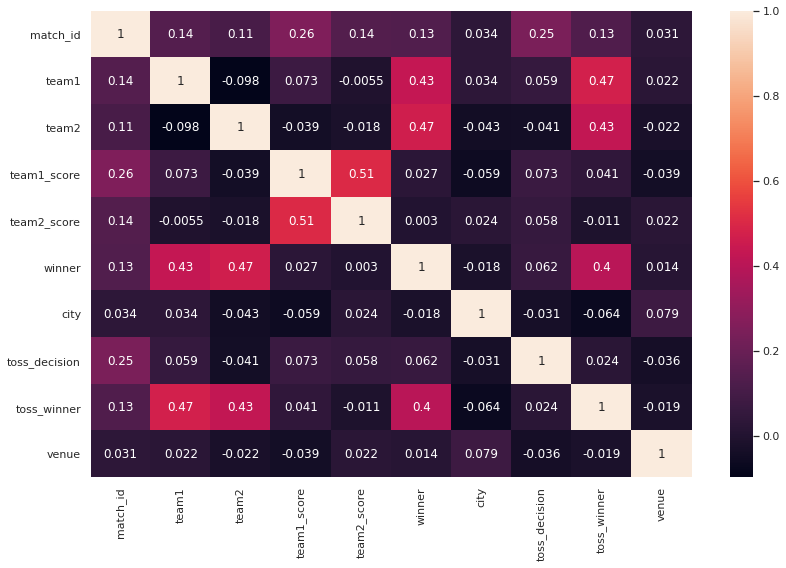

In [522]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.heatmap(merged_df.corr(), annot=True)